#### Carregando as importações

In [1]:
import import_ipynb
from imports.imports_common import *
from imports.imports_common_models_DL import *
from imports.imports_common_metrics import *

importing Jupyter notebook from c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\imports\imports_common.ipynb
importing Jupyter notebook from c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\imports\imports_common_models_DL.ipynb
importing Jupyter notebook from c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\imports\imports_common_metrics.ipynb


Carregamos cada imagem em uma lista e salvamos o rótulo correspondente em outra lista

In [2]:
# Criação do gerador de dados com aumento (data augmentation) apenas para o conjunto de treinamento
train_datagen = ImageDataGenerator(
    rescale = RESCALE,
    validation_split = VAL_SPLIT,  # Define a porcentagem de validação
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

In [3]:
# Gerador de dados para o conjunto de treinamento
dataset_train = train_datagen.flow_from_directory(
    path,
    target_size = IMAGE_SIZE,
    batch_size = BATCH_SIZE,
    color_mode = COLOR_MODE,
    class_mode = 'categorical',
    subset = 'training', # Define o subset como treinamento
    seed = SEED
)

Found 5121 images belonging to 4 classes.


In [4]:
# Gerador de dados para o conjunto de validação
dataset_validation = train_datagen.flow_from_directory(
    path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    color_mode=COLOR_MODE,
    class_mode='categorical',
    subset='validation',
    seed=SEED # Define o subset como validação
)

Found 1279 images belonging to 4 classes.


In [5]:
# Criação do gerador de dados para o conjunto de teste (sem aumento de dados)
test_datagen = ImageDataGenerator(
    rescale = RESCALE
)

In [6]:
dataset_test = test_datagen.flow_from_directory(
    path,
    target_size = IMAGE_SIZE,
    batch_size = BATCH_SIZE,
    color_mode = COLOR_MODE,
    class_mode ='categorical',
    subset = None,
    shuffle = False, # Não embaralhar os dados de teste
    seed = SEED
)

Found 6400 images belonging to 4 classes.


In [7]:
# Cria modelo
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(*IMAGE_SIZE, 1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    Flatten(),
    Dense(4, activation='softmax')
])

In [8]:
# Compila modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# Treinar modelo
history = model.fit(
    dataset_train,
    validation_data=dataset_validation,
    epochs=EPOCHS,
    callbacks=[early_stop]
)

Epoch 1/30
161/161 [==============================] - 134s 807ms/step - loss: 1.0302 - accuracy: 0.4931 - val_loss: 1.1094 - val_accuracy: 0.4934
Epoch 2/30
161/161 [==============================] - 105s 648ms/step - loss: 0.9104 - accuracy: 0.5647 - val_loss: 1.3500 - val_accuracy: 0.2697
Epoch 3/30
161/161 [==============================] - 78s 482ms/step - loss: 0.8651 - accuracy: 0.5862 - val_loss: 1.3977 - val_accuracy: 0.4472
Epoch 4/30
161/161 [==============================] - 71s 441ms/step - loss: 0.8313 - accuracy: 0.6100 - val_loss: 1.4452 - val_accuracy: 0.3159
Epoch 5/30
161/161 [==============================] - 67s 418ms/step - loss: 0.7904 - accuracy: 0.6335 - val_loss: 1.4290 - val_accuracy: 0.3471
Epoch 6/30
161/161 [==============================] - 67s 415ms/step - loss: 0.7591 - accuracy: 0.6471 - val_loss: 1.2740 - val_accuracy: 0.3706


In [10]:
# Avaliar o modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(dataset_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

200/200 [==============================] - 22s 110ms/step - loss: 0.9562 - accuracy: 0.5494
Test Loss: 0.9561917185783386
Test Accuracy: 0.5493749976158142


In [15]:
# Prever as classes do conjunto de teste
dataset_test.reset()
predictions = model.predict(dataset_test)
predicted_classes = np.argmax(predictions, axis=1)

# Obter as classes verdadeiras do conjunto de teste
true_classes = dataset_test.classes

# Obter os rótulos das classes
class_labels = list(dataset_test.class_indices.keys())

# Imprimir o relatório de classificação
print('Classification Report:')
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

200/200 [==============================] - 83s 409ms/step
Classification Report:
                    precision    recall  f1-score   support

     Mild_Demented       0.00      0.00      0.00       896
 Moderate_Demented       0.00      0.00      0.00        64
      Non_Demented       0.50      1.00      0.67      3200
Very_Mild_Demented       0.00      0.00      0.00      2240

          accuracy                           0.50      6400
         macro avg       0.12      0.25      0.17      6400
      weighted avg       0.25      0.50      0.33      6400



c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples

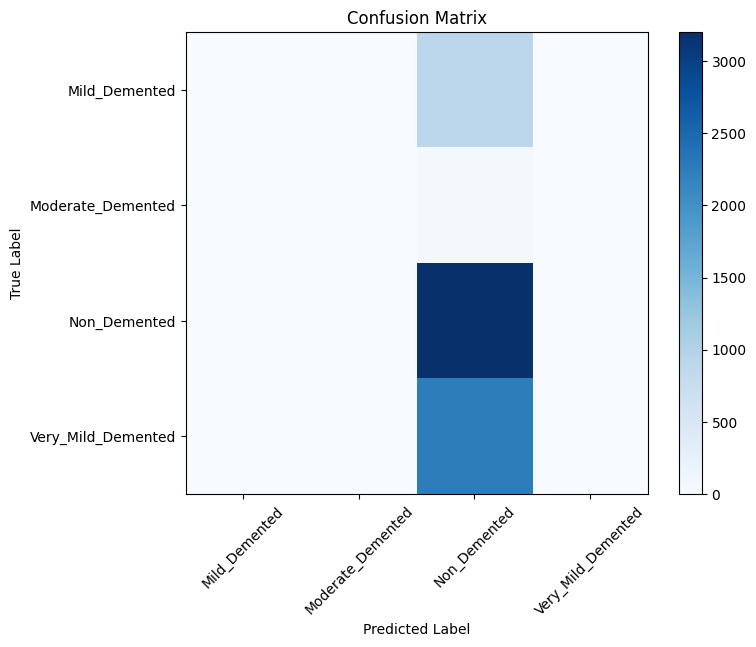

In [16]:
# Calcular e plotar a matriz de confusão
confusion_mtx = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()